In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
Dfile_path = "/content/drive/My Drive/Ivey/Data Management/HR-Employee-Attrition.csv"
df = pd.read_csv(Dfile_path)

# Display the first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#Step 1: Distinguish key attributes of interest

In [178]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobRole                   1470 non-null   

In [179]:
print(len(df.columns))
print(len(df))
df.head(5)

30
1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,IncomeBin,TotalWorkingYears_zscore,IncomePerYear,IncomeCategory
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,Yes,1,0,8,0,1,"(5756.5, 6706.0]",-0.421642,665.888889,Middle
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,No,4,1,10,3,3,"(4807.0, 5756.5]",-0.164511,466.363636,Lower-Middle
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,Yes,2,0,7,3,3,"(1958.5, 2908.0]",-0.550208,261.250000,Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,Yes,3,0,8,3,3,"(2908.0, 3857.5]",-0.421642,323.222222,Lower-Mid
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,No,4,1,6,3,3,"(2908.0, 3857.5]",-0.678774,495.428571,Lower-Mid


#Step2: Detect missing values and treat if possible (Preprocessing)

In [152]:
df.drop_duplicates()
print(len(df))
df.isnull().sum()

1470


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


checking for unique values in each column

In [153]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].value_counts())
  print("-" * 20)

Column: Age
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
--------------------
Column: Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------
Column: BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------
Column: DailyRate
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64
--------------------
Column: Department
Department
Research & Development    961
Sales                     446


dropping 3 columns which aren't valuable and has the same value for all the rows

In [154]:
df = df.drop(['StandardHours', 'EmployeeCount','PerformanceRating'], axis=1)

#Step 3: Conduct univariate analysis on these attributes

In [155]:
department_counts = df['Department'].value_counts()
department_counts

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


<ipython-input-156-5fa50de1582a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_counts.index, y=department_counts.values, palette ='viridis')


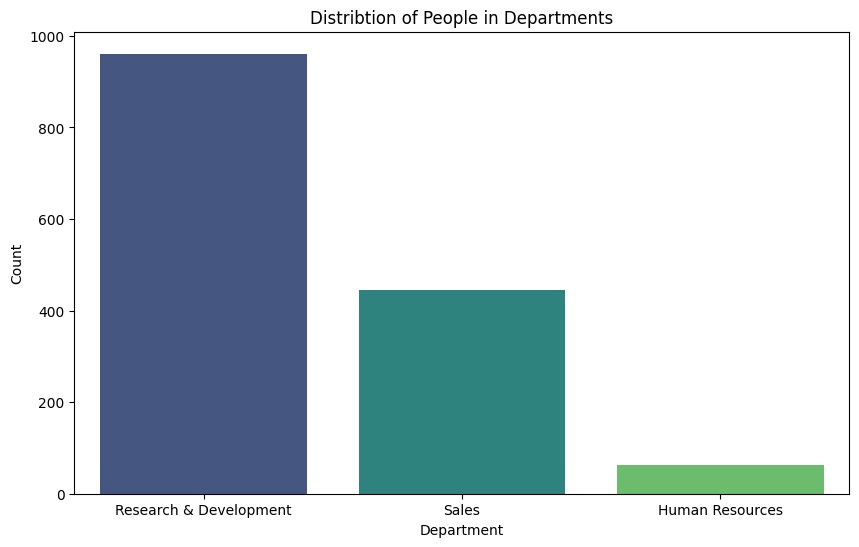

In [156]:
plt.figure(figsize=(10,6))
sns.barplot(x=department_counts.index, y=department_counts.values, palette ='viridis')
plt.title('Distribtion of People in Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [157]:
JobRole_count = df['JobRole'].value_counts()

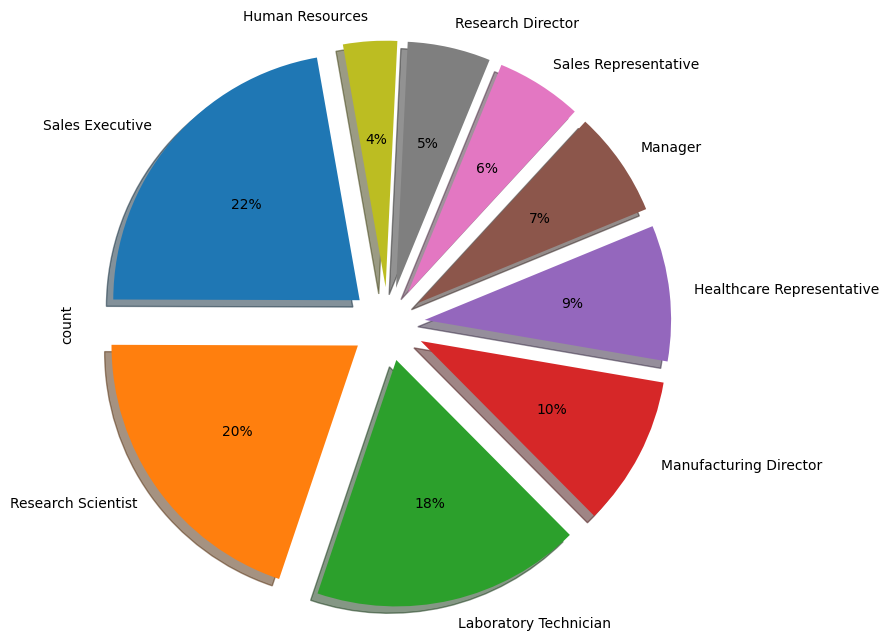

In [158]:
plt.figure(figsize = (12,8))
JobRole_count.plot(kind = 'pie',
                   autopct = '%1.0f%%',
                   explode = [0.15]*len(JobRole_count),
                  shadow = True,
                  startangle=100)
plt.show();

#Step4: Conduct bi-/multivariate analysis to detect relationships

Gender over EducationField

In [159]:
gender_education_counts = df.groupby(['EducationField', 'Gender'])['Gender'].count().unstack()

gender_education_counts

Gender,Female,Male
EducationField,,
Human Resources,8,19
Life Sciences,240,366
Marketing,69,90
Medical,190,274
Other,29,53
Technical Degree,52,80


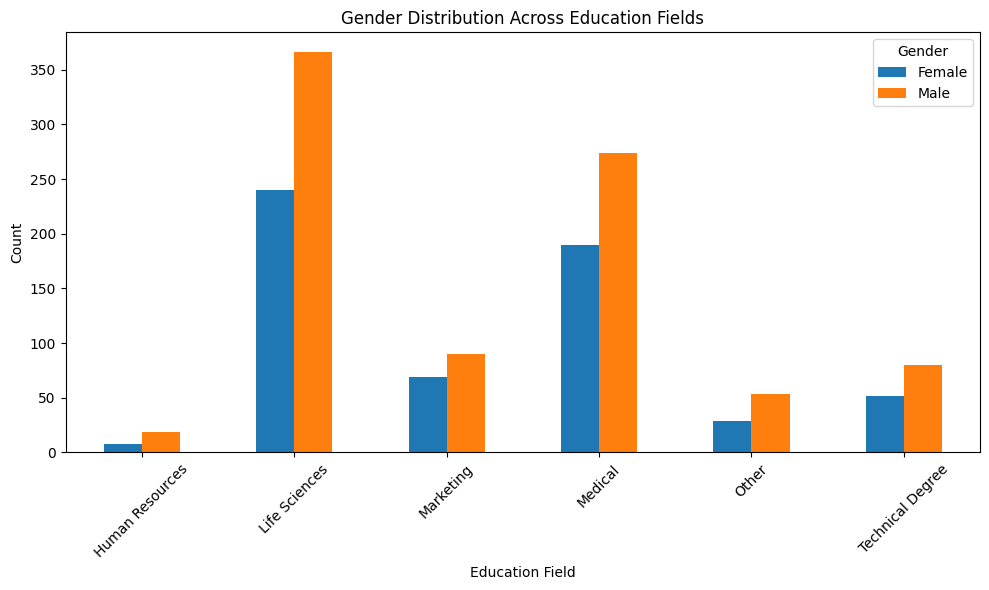

In [160]:
gender_education_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Distribution Across Education Fields')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


<ipython-input-161-6e3dec5b628e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_satisfaction = df.groupby('IncomeBin')['JobSatisfaction'].mean()


IncomeBin
(990.01, 1958.5]      2.909091
(1958.5, 2908.0]      2.725904
(2908.0, 3857.5]      2.720779
(3857.5, 4807.0]      2.646154
(4807.0, 5756.5]      2.736842
(5756.5, 6706.0]      2.890756
(6706.0, 7655.5]      2.753623
(7655.5, 8605.0]      2.650000
(8605.0, 9554.5]      2.857143
(9554.5, 10504.0]     2.661765
(10504.0, 11453.5]    2.684211
(11453.5, 12403.0]    2.722222
(12403.0, 13352.5]    2.285714
(13352.5, 14302.0]    2.903226
(14302.0, 15251.5]    3.285714
(15251.5, 16201.0]    3.090909
(16201.0, 17150.5]    2.333333
(17150.5, 18100.0]    2.750000
(18100.0, 19049.5]    2.523810
(19049.5, 19999.0]    2.847826
Name: JobSatisfaction, dtype: float64


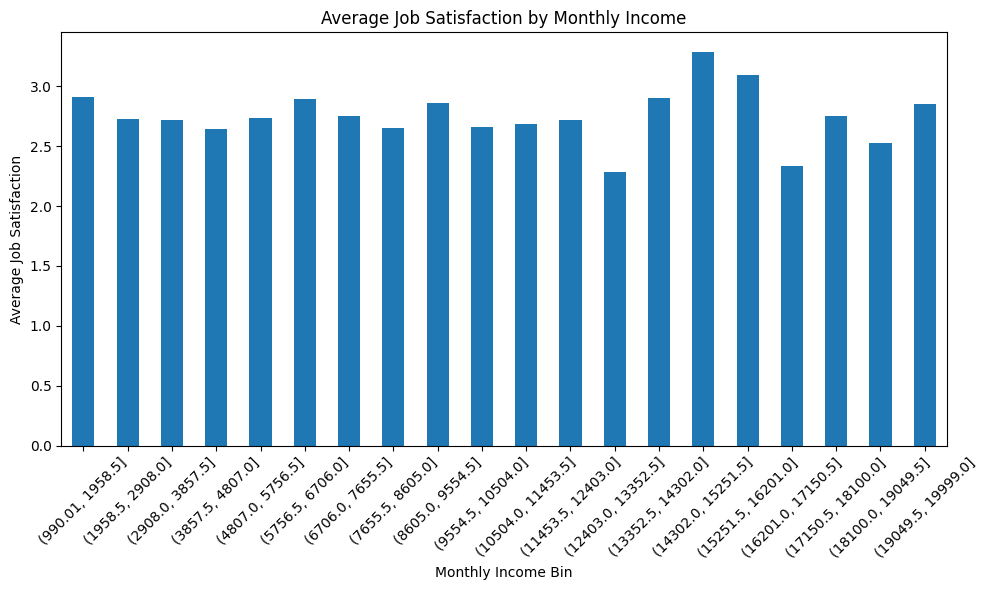

In [161]:
df['IncomeBin'] = pd.cut(df['MonthlyIncome'], bins=20)

income_satisfaction = df.groupby('IncomeBin')['JobSatisfaction'].mean()

print(income_satisfaction)

plt.figure(figsize=(10, 6))
income_satisfaction.plot(kind='bar')
plt.xlabel('Monthly Income Bin')
plt.ylabel('Average Job Satisfaction')
plt.title('Average Job Satisfaction by Monthly Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Step4.5: Check for correlation

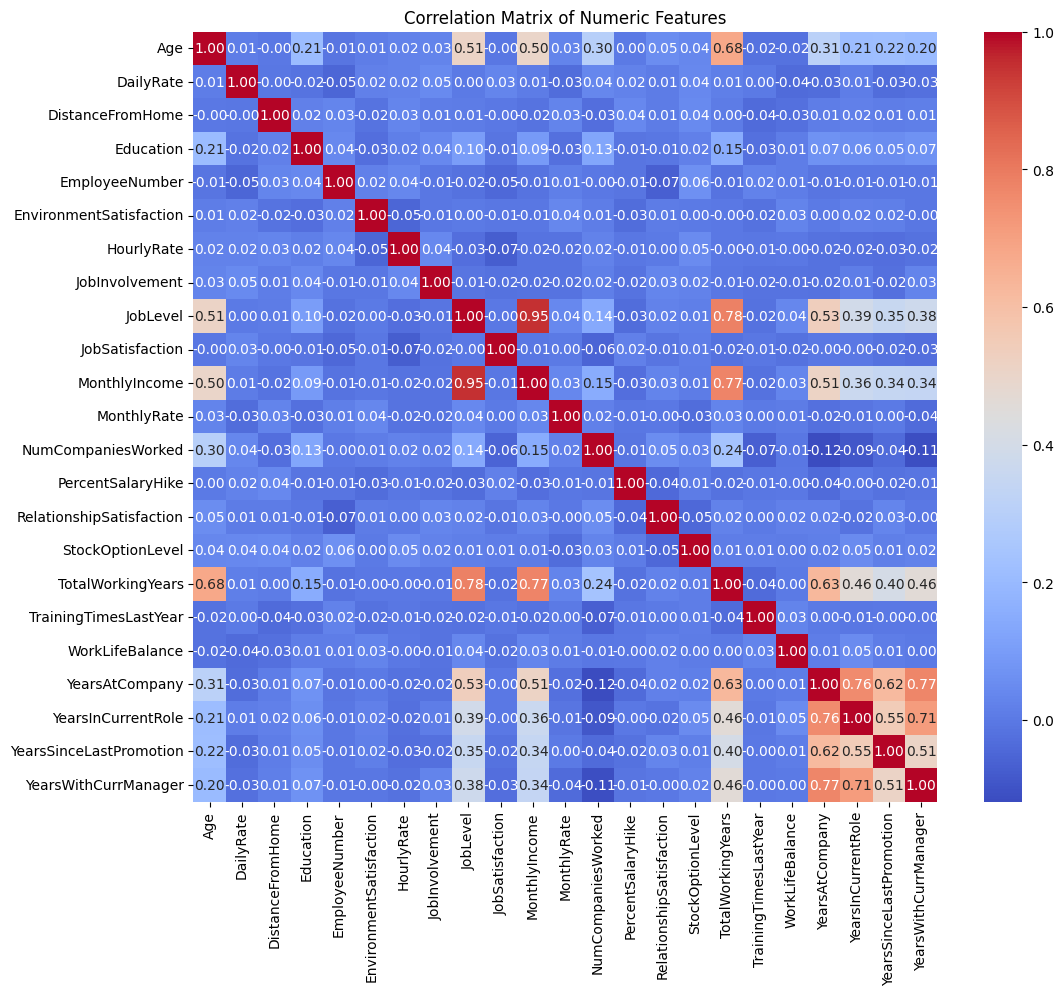

In [162]:
numeric_columns = df.select_dtypes(include=np.number)

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [163]:
#if we want to do furthur analysis like prediction we can deal with highly correlated by deleting them
df = df.drop(['JobLevel', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','PercentSalaryHike'], axis=1)
#print(len(df.columns))

#Step: Detect outliers and treat if possible

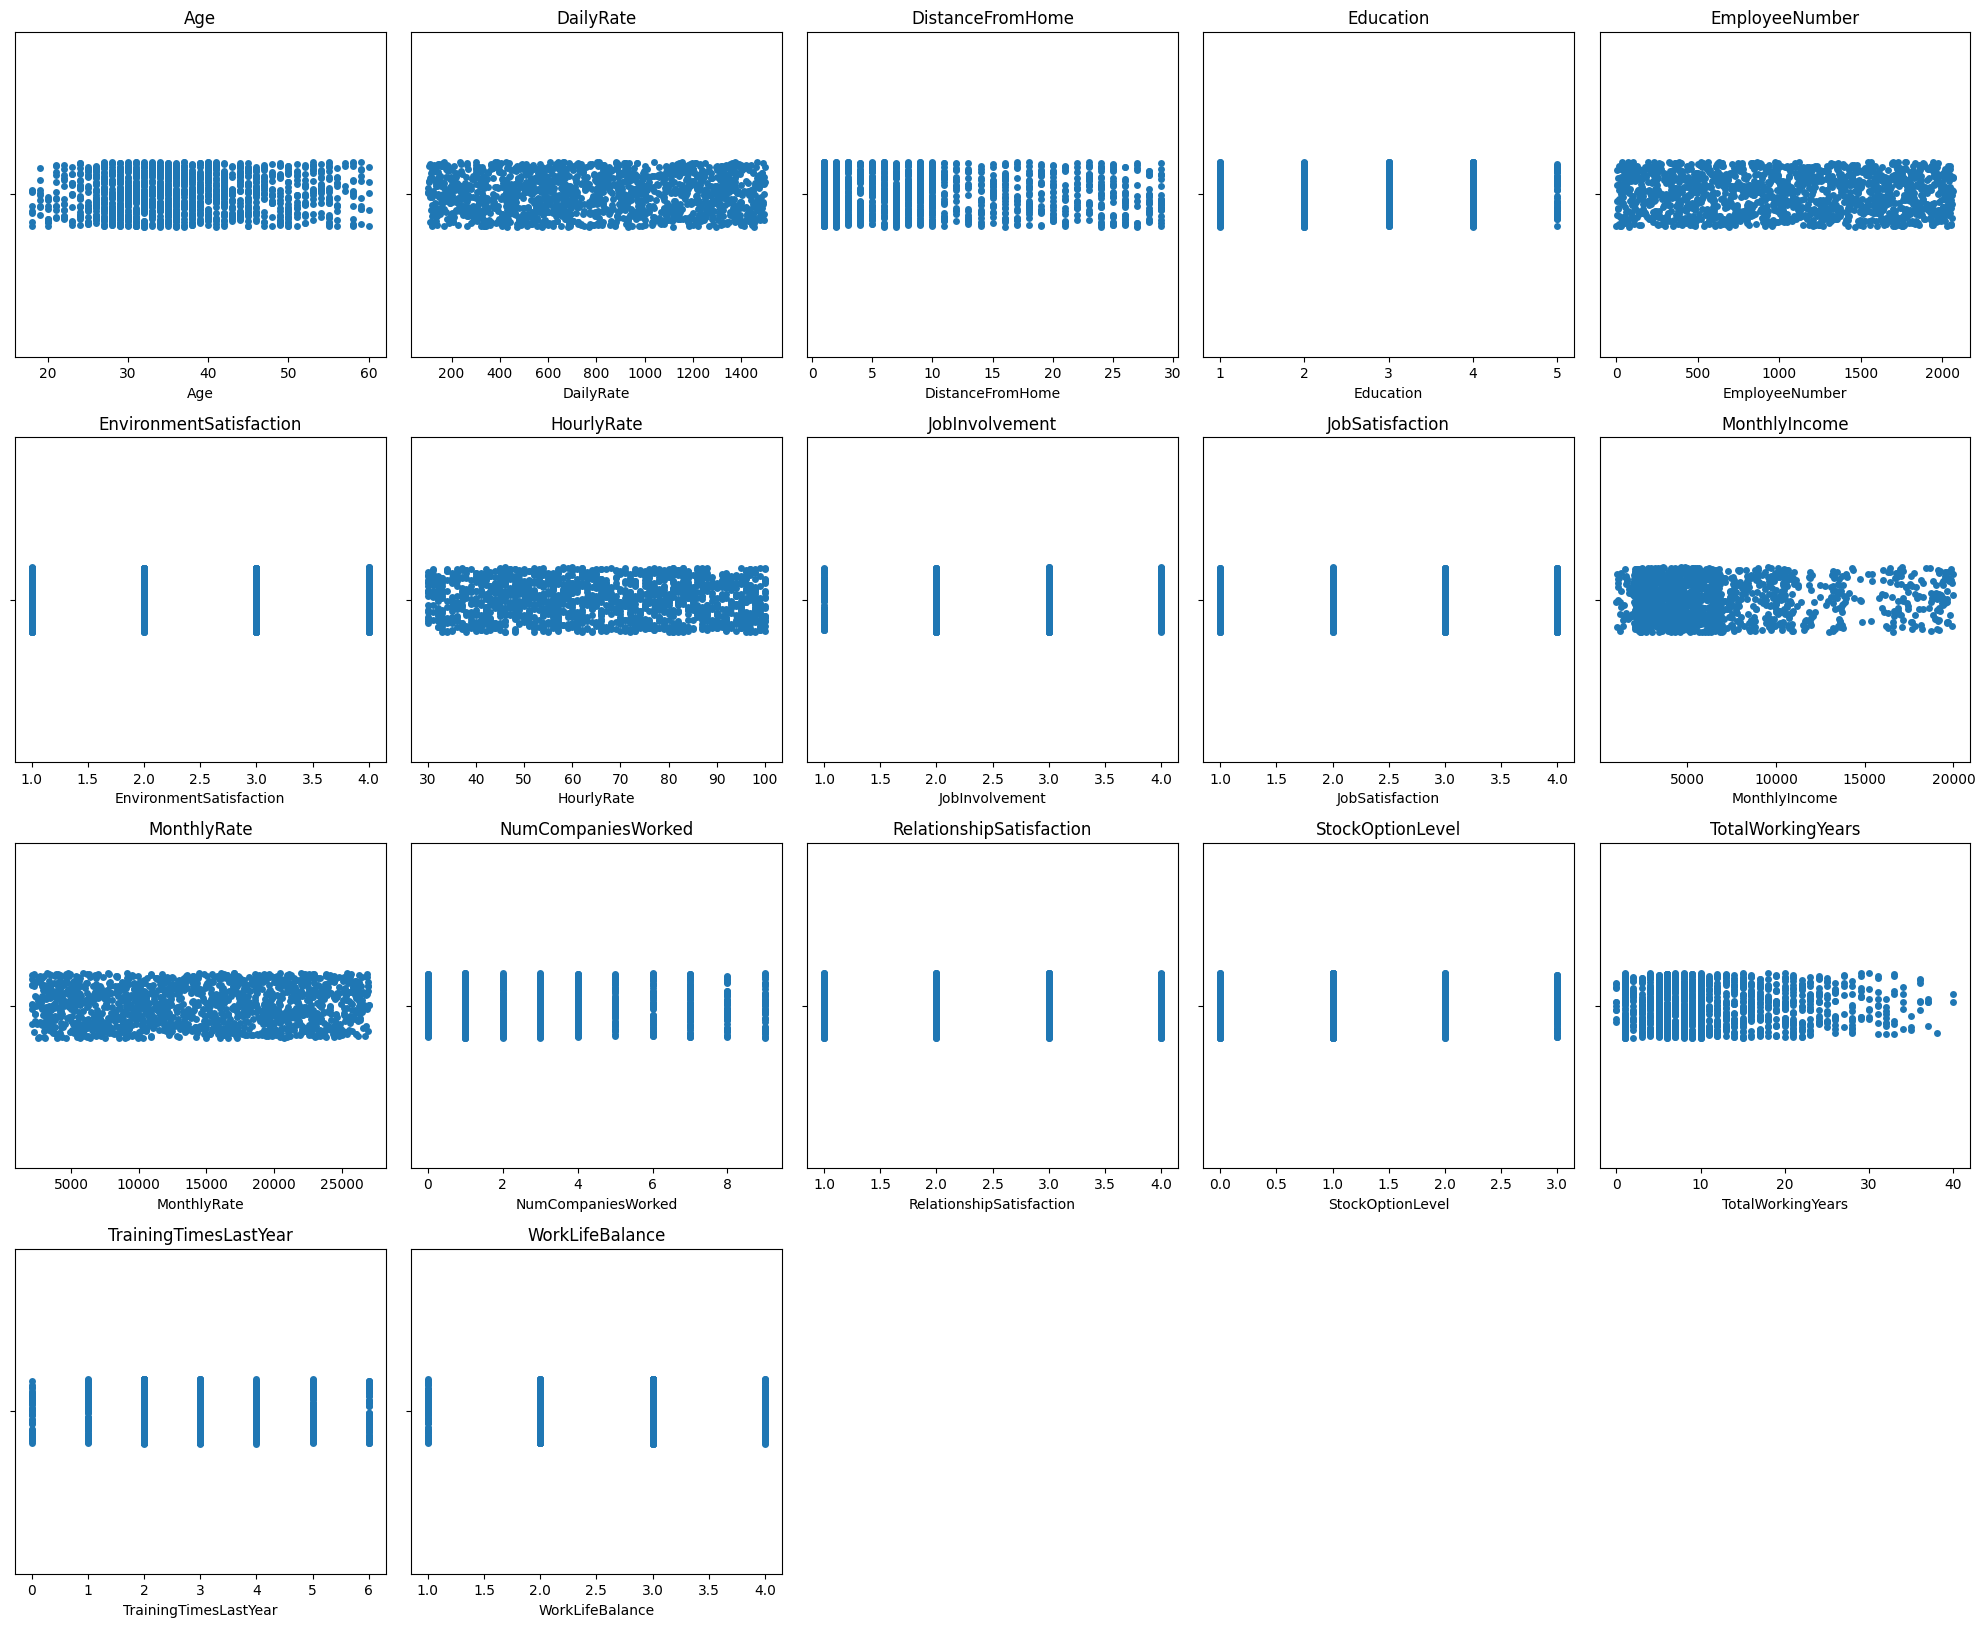

In [164]:
numeric_cols = df.select_dtypes(include=np.number).columns
num_plots = len(numeric_cols)

fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < num_plots:
        sns.stripplot(x=df[col], ax=axes[i], jitter=True)
        axes[i].set_title(col)
    else:
        break

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


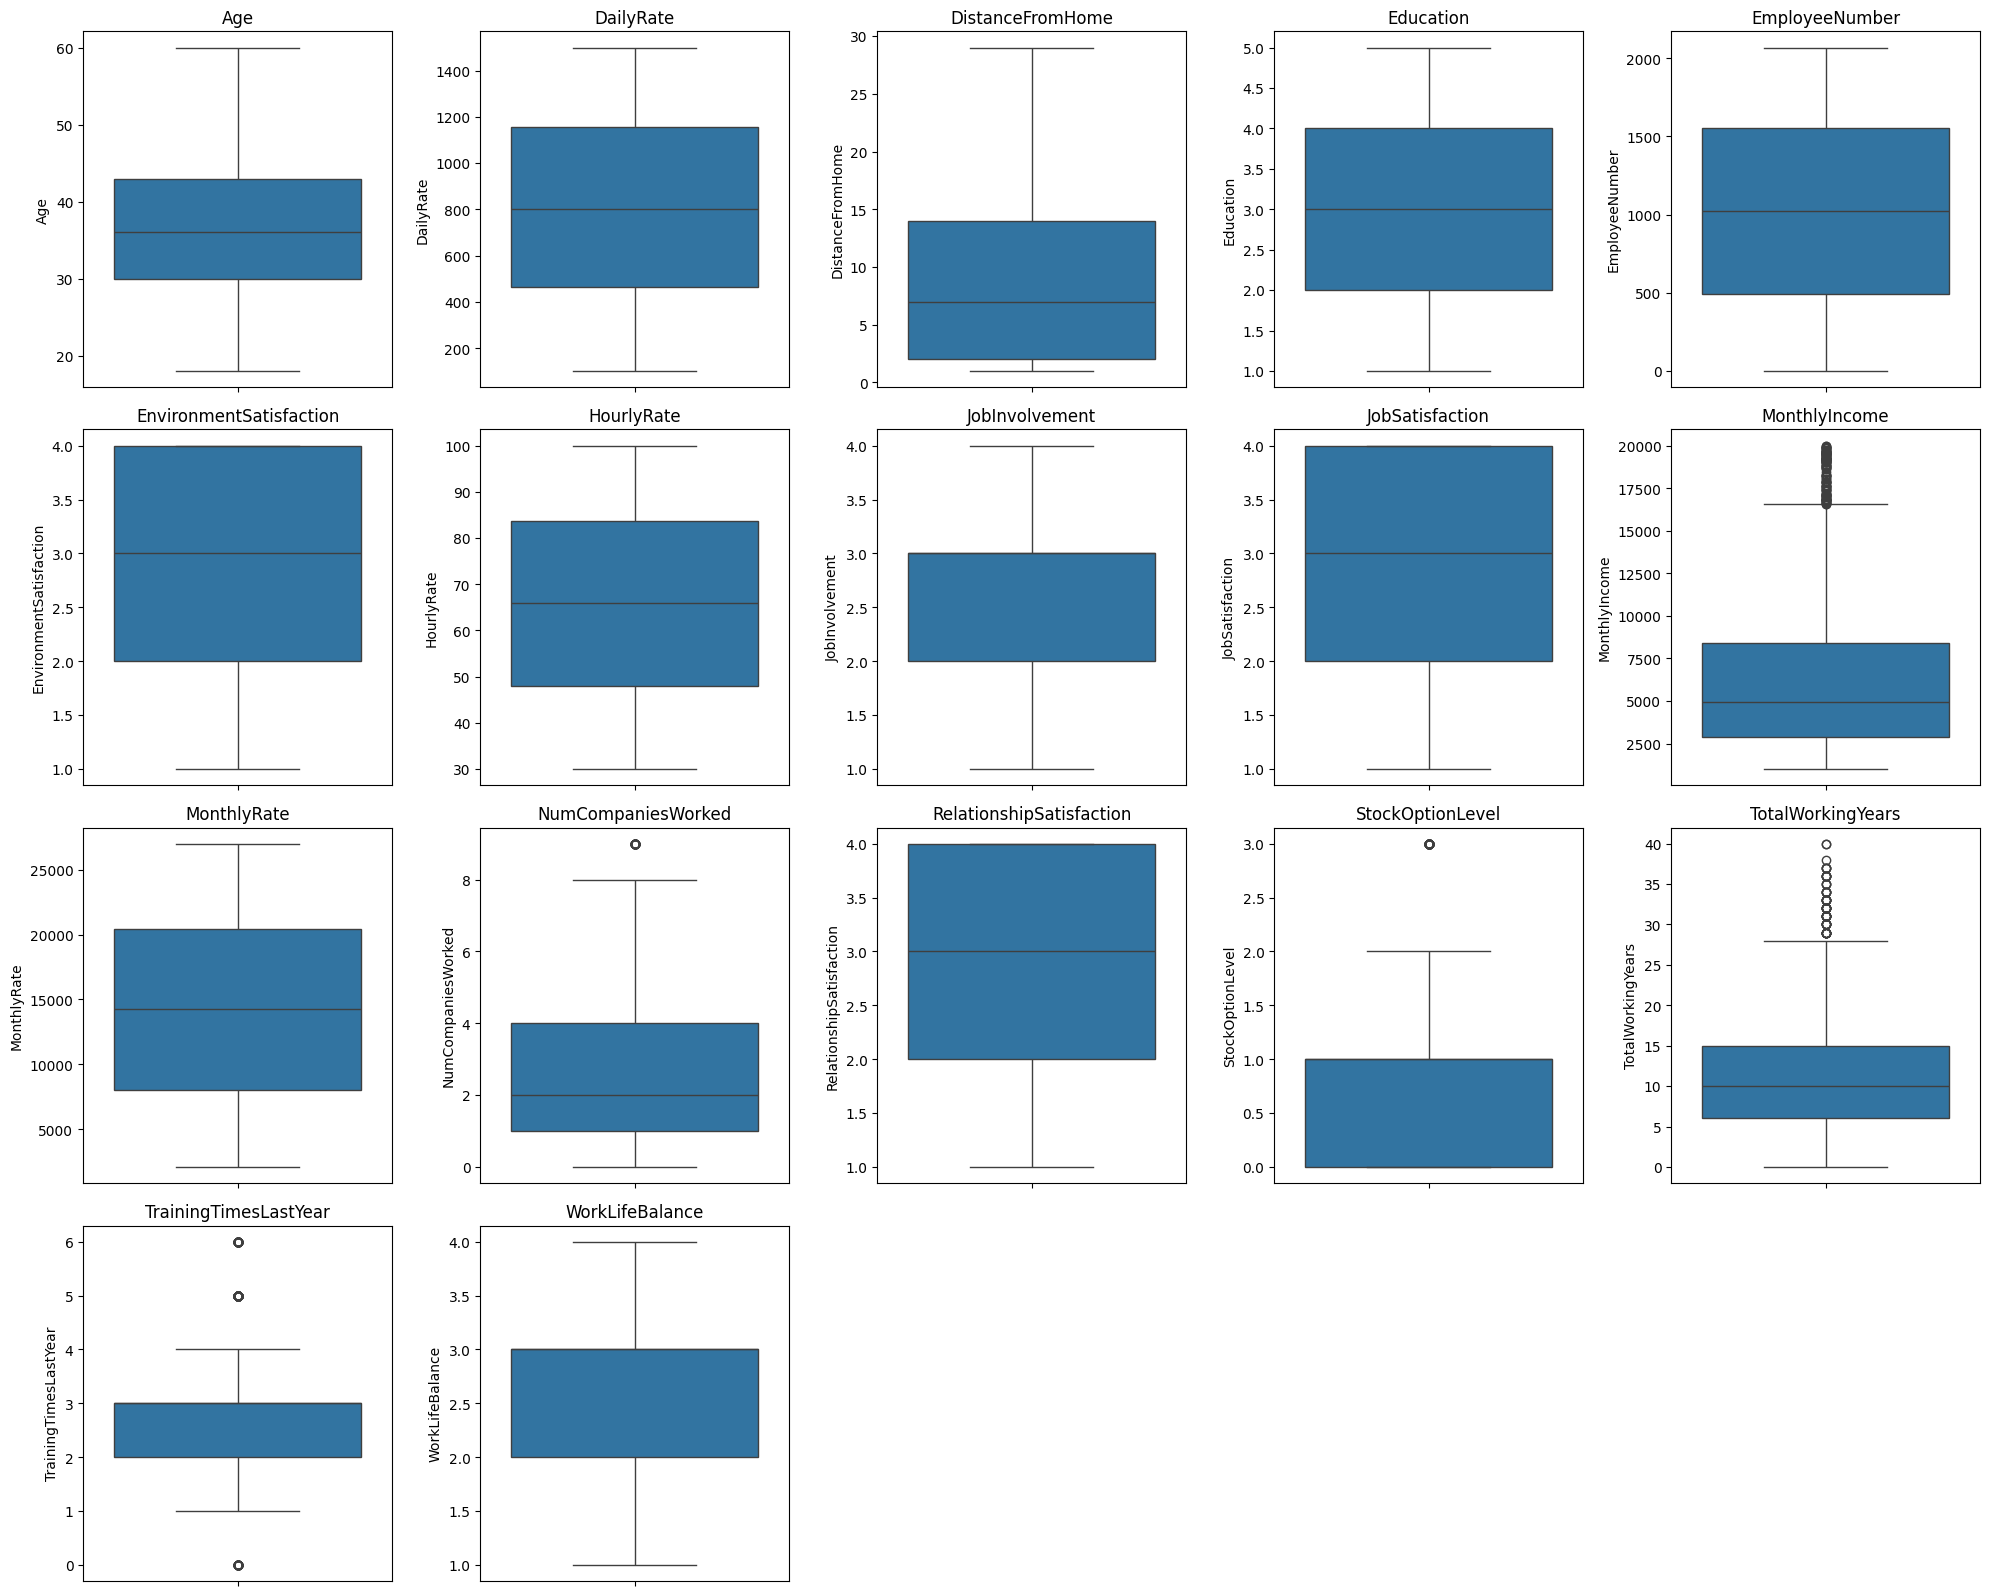

In [165]:
numeric_cols = df.select_dtypes(include=np.number).columns
num_plots = len(numeric_cols)
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < num_plots:
        sns.boxplot(y=df[col], ax=axes[i], orient='v')
        axes[i].set_title(col)
    else:
      break

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


checking for the outlier

In [166]:
from scipy.stats import zscore

# Calculate z-scores for 'TotalWorkingYears'
df['TotalWorkingYears_zscore'] = zscore(df['TotalWorkingYears'])

# Identify outliers based on z-score threshold (e.g., |z-score| > 3)
outliers = df[(df['TotalWorkingYears_zscore'] > 3) | (df['TotalWorkingYears_zscore'] < -3)]

# Print or further analyze the outliers
print(outliers[['EmployeeNumber', 'TotalWorkingYears', 'TotalWorkingYears_zscore','MonthlyIncome']])


      EmployeeNumber  TotalWorkingYears  TotalWorkingYears_zscore  \
85               112                 37                  3.306758   
98               131                 38                  3.435323   
126              165                 40                  3.692454   
187              254                 36                  3.178192   
270              374                 37                  3.306758   
401              532                 36                  3.178192   
445              597                 37                  3.306758   
595              825                 40                  3.692454   
624              862                 35                  3.049627   
894             1250                 36                  3.178192   
956             1338                 36                  3.178192   
1043            1472                 35                  3.049627   
1116            1578                 36                  3.178192   
1184            1665              

#Step 6: Do some feature engineering by creating one new feature

New Feature: IncomePerYear

Formula: MonthlyIncome / (TotalWorkingYears + 1)


Reason: Helps normalize income by experience. Adding 1 to avoid division by zero for employees with no prior experience.

In [167]:
df['IncomePerYear'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)

Creating a new column based on IncomeBin and categorized it into meaningful income groups.

In [168]:
income_bin_mapping = {
    "(990.0, 1958.5]": "Very Low",
    "(1958.5, 2908.0]": "Low",
    "(2908.0, 3857.5]": "Lower-Mid",
    "(3857.5, 4807.0]": "Mid-Low",
    "(4807.0, 5756.5]": "Lower-Middle",
    "(5756.5, 6706.0]": "Middle",
    "(6706.0, 7655.5]": "Upper-Middle",
    "(7655.5, 8605.0]": "Moderate High",
    "(8605.0, 9554.5]": "Upper Moderate",
    "(9554.5, 10504.0]": "Comfortable",
    "(10504.0, 11453.5]": "High Moderate",
    "(11453.5, 12403.0]": "Well-Off",
    "(12403.0, 13352.5]": "Affluent",
    "(13352.5, 14302.0]": "Upper Affluent",
    "(14302.0, 15251.5]": "Wealthy",
    "(15251.5, 16201.0]": "Very Wealthy",
    "(16201.0, 17150.5]": "Elite",
    "(17150.5, 18100.0]": "Upper Elite",
    "(18100.0, 19049.5]": "Top 1%",
    "(19049.5, 19999.0]": "Executive"
}

df["IncomeBin"] = df["IncomeBin"].astype(str)

df["IncomeCategory"] = df["IncomeBin"].map(income_bin_mapping)

print(df[['IncomeBin', 'IncomeCategory']].head())


          IncomeBin IncomeCategory
0  (5756.5, 6706.0]         Middle
1  (4807.0, 5756.5]   Lower-Middle
2  (1958.5, 2908.0]            Low
3  (2908.0, 3857.5]      Lower-Mid
4  (2908.0, 3857.5]      Lower-Mid


In [169]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,IncomeBin,TotalWorkingYears_zscore,IncomePerYear,IncomeCategory
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,Yes,1,0,8,0,1,"(5756.5, 6706.0]",-0.421642,665.888889,Middle
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,No,4,1,10,3,3,"(4807.0, 5756.5]",-0.164511,466.363636,Lower-Middle
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,Yes,2,0,7,3,3,"(1958.5, 2908.0]",-0.550208,261.250000,Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,Yes,3,0,8,3,3,"(2908.0, 3857.5]",-0.421642,323.222222,Lower-Mid
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,No,4,1,6,3,3,"(2908.0, 3857.5]",-0.678774,495.428571,Lower-Mid


In [176]:
reversed_head = df.head(5).T

reversed_head


,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeNumber,1,2,4,5,7
EnvironmentSatisfaction,2,3,4,4,1
